### Bibliotheken importieren

In [13]:
import pandas as pd
import nltk
import string
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import spacy

# nltk.download('punkt') # Punkt Tokenizer -> Satzerkennung

# pip install nltk
# pip install matplotlib pandas
# pip install spacy
# python -m spacy download en_core_web_sm

### Finales Dataframe speichern

### Datenimport

In [2]:
# Datensets einlesen
sentence = pd.read_csv(r'sentence_dataset.csv',header= 0)
tt = pd.read_csv(r'tt_dataset.csv', delimiter= ',', header= 0)


### Data Understanding

#### Basierend auf vollständigen Tongue Twister und Satz

In [3]:
# Durchschnittliche Satz/TT-Länge
# TT
längeZeile = tt['text'].apply(len)
durchschnittLänge = int(round(längeZeile.mean()))

print("Die durschschnittliche Länge (Zeichen) der Toungue Twister beträgt (gerundet):" , durchschnittLänge)

# Sentence
längeSent = sentence['sentence'].apply(len)
durchschnittSent = int(round(längeSent.mean()))

print("Die durschschnittliche Länge (Zeichen) der Sätze beträgt (gerundet):" , durchschnittSent)

Die durschschnittliche Länge (Zeichen) der Toungue Twister beträgt (gerundet): 78
Die durschschnittliche Länge (Zeichen) der Sätze beträgt (gerundet): 56


In [4]:
# Fragestellung: Bestehen Tongue Twister in der Regel nur aus einem Satz?
# Funktionsdefinition
def zähle_sätze(Sätze):
    sätze = nltk.sent_tokenize(Sätze)
    return len(sätze)

# TT
tt['AnzahlSätze'] = tt['text'].apply(zähle_sätze)

durchschnittAnzahlSätzeTT = round(tt['AnzahlSätze'].mean(), 2)
maximaleAnzahlSätzeTT = round(tt['AnzahlSätze'].max(), 2)

print("Die durchschnittliche Anzahl von Sätzen der Tongue Twister ist (gerundet):", durchschnittAnzahlSätzeTT)
print("Die maximale Anzahl von Sätzen eines Tongue Twister ist (gerundet):", maximaleAnzahlSätzeTT)

# größterTT = tt.loc[tt['AnzahlSätze'] == 66]
# print(größterTT)

# Überprüfung Annahme Sentence-Datensatz: Immer aus einem Satz bestehend
sentence['AnzahlSätze'] = sentence['sentence'].apply(zähle_sätze)

durchschnittAnzahlSätzeSentence = round(sentence['AnzahlSätze'].max(), 2)

print("Die maximale Anzahl von Sätzen ist (gerundet):", durchschnittAnzahlSätzeSentence)

Die durchschnittliche Anzahl von Sätzen der Tongue Twister ist (gerundet): 1.45
Die maximale Anzahl von Sätzen eines Tongue Twister ist (gerundet): 66
Die maximale Anzahl von Sätzen ist (gerundet): 1


In [5]:
# Wortanzahl je Satz/TT und im Durchschnitt
# Funktionsdefinition
def wortanzahl (wortAnzahl):
    wörterZahl = wortAnzahl.split()
    return len(wörterZahl)

# TT
tt['Wortanzahl'] = tt['text'].apply(wortanzahl)
durchschnittWortanzahlTT = int(round(tt['Wortanzahl'].mean()))

print("Die durchschnittliche Wortanzahl der Tongue Twister beträgt (gerundet):" , durchschnittWortanzahlTT)

# Sentence
sentence['Wortanzahl'] = sentence['sentence'].apply(wortanzahl)
durchschnittWortanzahlSent = int(round(sentence['Wortanzahl'].mean()))

print("Die durchschnittliche Wortanzahl der Sätze beträgt (gerundet):" , durchschnittWortanzahlSent)

Die durchschnittliche Wortanzahl der Tongue Twister beträgt (gerundet): 13
Die durchschnittliche Wortanzahl der Sätze beträgt (gerundet): 10


In [6]:
# Zählen der Wortlängen sowie deren Varianz je Satz/TT und im Durchschnitt
# Funktionsdefinition
def wortlängen(wort):
    wörter = wort.split()
    return [len(wort) for wort in wörter]

#TT
tt['Wortlängen'] = tt['text'].apply(wortlängen)  

varWortlängenTT = tt['Wortlängen'].apply(np.var)
tt['VarWortlängen'] = varWortlängenTT
durchVarWortlängenTT = round(varWortlängenTT.mean(),2)

print("Die durschnittliche Varianz der Wortlängen von Tongue Twistern beträgt (gerundet):" , durchVarWortlängenTT)

# Sentence
sentence['Wortlängen'] = sentence['sentence'].apply(wortlängen)  

varWortlängenSent = sentence['Wortlängen'].apply(np.var)
sentence['VarWortlängen'] = varWortlängenSent
durchVarWortlängenSent = round(varWortlängenSent.mean(),2)

print("Die durschnittliche Varianz der Wortlängen der Sätze beträgt (gerundet):" , durchVarWortlängenSent)

Die durschnittliche Varianz der Wortlängen von Tongue Twistern beträgt (gerundet): 4.11
Die durschnittliche Varianz der Wortlängen der Sätze beträgt (gerundet): 6.33


In [40]:
# Zählen von Verben/Adjektiven und Nomen (unfertig)
# Englisches Sprachmodell laden
nlp = spacy.load("en_core_web_sm")
#Funktionsdefinition
def zähle_wortarten (text):
    textToken = nlp(text)
    posTags = [token.pos for token in textToken]
    counts = {
        'Verben': posTags.count('VERB'),
        'Adjektive': posTags.count('ADJ'),
        'Nomen': posTags.count('NOUN')
    }
    return counts
#TT
ttString = str(tt['text'])
# tt['VerbenAdjektiveNomen'] = tt['text'].apply(zähle_wortarten)
# tt
#Sentence
tt['VerbenAdjektiveNomen'] = zähle_wortarten(ttString)


In [ ]:
# CFD (condition?) L01/118
#TT

#Sentence

In [ ]:
# Konsonanten herausfinden L02/123 (TT mehr als in Sentence? Wiederholungen etc.) 

In [ ]:
# Extrem Lange Wörter L01/91 -> TT weniger als in Sätzen?

In [ ]:
# Häufigstes Wort in TT und Sätzen (analog https://www.kaggle.com/code/djathidiro/starter-tongue-twister-dataset/notebook)

#### Basierend auf Phoneme

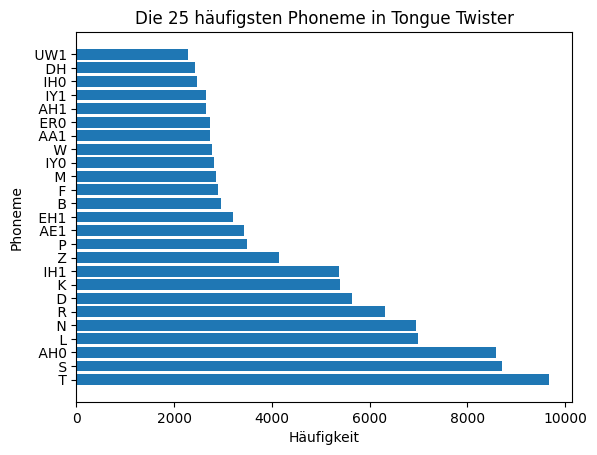

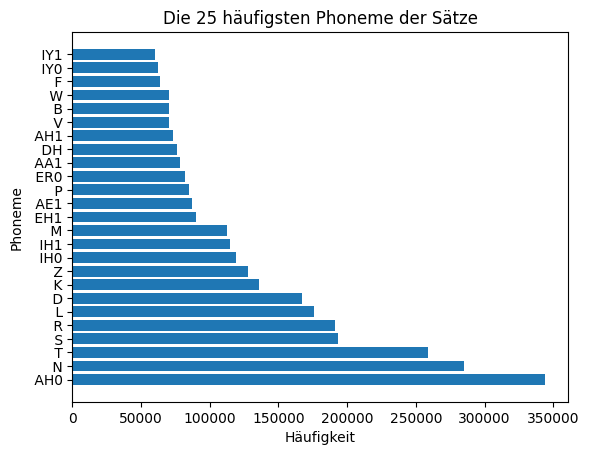

,text,phonemes,soundex,AnzahlSätze,Wortanzahl,Wortlängen,VarWortlängen,VerbenAdjektiveNomen,AnzahlPhoneme
0,Peter Piper picked a peck of pickled peppers. ...,"[['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', '...","['P360', 'P160', 'P230', 'A000', 'P200', 'O100...",3,34,"[5, 5, 6, 1, 4, 2, 7, 8, 1, 4, 2, 7, 7, 5, 5, ...",4.575260,NaN,NaN
1,I saw Susie sitting in a shoe shine shop. Wher...,"[['AY1'], ['S', 'AO1'], ['S', 'UW1', 'Z', 'IY0...","['I000', 'S000', 'S200', 'S352', 'I500', 'A000...",2,20,"[1, 3, 5, 7, 2, 1, 4, 5, 5, 5, 3, 4, 3, 7, 3, ...",2.800000,NaN,NaN
2,How many boards Could the Mongols hoard If the...,"[['HH', 'AW1'], ['M', 'EH1', 'N', 'IY0'], ['B'...","['H000', 'M500', 'B632', 'C430', 'T000', 'M524...",1,13,"[3, 4, 6, 5, 3, 7, 5, 2, 3, 6, 6, 3, 6]",2.402367,NaN,NaN
3,How can a clam cram in a clean cream can?,"[['HH', 'AW1'], ['K', 'AE1', 'N'], ['AH0'], ['...","['H000', 'C500', 'A000', 'C450', 'C650', 'I500...",1,10,"[3, 3, 1, 4, 4, 2, 1, 5, 5, 4]",1.960000,NaN,NaN
4,Send toast to ten tense stout saints' ten tall...,"[['S', 'EH1', 'N', 'D'], ['T', 'OW1', 'S', 'T'...","['S530', 'T230', 'T000', 'T500', 'T520', 'S330...",1,10,"[4, 5, 2, 3, 5, 5, 7, 3, 4, 6]",2.040000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2671,Then step up mister and twist your tongue,"[['DH', 'EH1', 'N'], ['S', 'T', 'EH1', 'P'], [...","['T500', 'S310', 'U100', 'M236', 'A530', 'T230...",1,8,"[4, 4, 2, 6, 3, 5, 4, 6]",1.687500,NaN,NaN
2672,Now Kissle will whistle at busty Miss. Russell...,"[['N', 'AW1'], ['K', 'IH1', 'S', 'AH0', 'L'], ...","['N000', 'K240', 'W400', 'W234', 'A300', 'B230...",2,31,"[3, 6, 4, 7, 2, 5, 5, 7, 6, 6, 3, 6, 4, 6, 4, ...",3.506764,NaN,NaN
2673,"Purple paper people, purple paper people, purp...","[['P', 'ER1', 'P', 'AH0', 'L'], ['P', 'EY1', '...","['P614', 'P160', 'P140', 'P614', 'P160', 'P140...",1,10,"[6, 5, 7, 6, 5, 7, 6, 5, 7, 3]",1.410000,NaN,NaN
2674,De doorgaans dappere Durgerdammer drukker Dirk...,"[['D', 'IY1'], ['D', 'AO1', 'R', 'G', 'AH0', '...","['D000', 'D625', 'D160', 'D626', 'D626', 'D620...",2,53,"[2, 9, 7, 12, 7, 4, 10, 3, 8, 5, 9, 5, 12, 6, ...",8.142399,NaN,NaN


In [34]:
# Phonemhäufigkeiten
# Alternative FreqDist (NLTK) L01/88 + Hapaxes (L01/90) (noch nicht betrachtet)
# Funktionsdefinition
def zähle_phoneme(listeVonListen):
    phonemHäufigkeit = Counter()

    for phonemStr in listeVonListen:
        phonemStr = phonemStr.replace('[', '').replace(']', '').replace("'", '')
        phoneme = phonemStr.split(",")
        phonemHäufigkeit.update(phoneme)
    return phonemHäufigkeit

### TT
phoneme = tt['phonemes']
anzahlPhoneme = zähle_phoneme(phoneme)
# tt['AnzahlPhoneme'] = anzahlPhoneme
dfAnzahlPhoneme = pd.DataFrame(list(anzahlPhoneme.items()), columns=['Phonem', 'Häufigkeit'])

# Sortiere das DataFrame nach der Häufigkeit
dfAnzahlPhoneme = dfAnzahlPhoneme.sort_values(by='Häufigkeit', ascending=False)

# Speichern der 25 häufigsten Phoneme
top25 = dfAnzahlPhoneme.head(25)

#Visualisierung in einem Balkendiagramm
plt.barh(top25['Phonem'], top25['Häufigkeit'])
plt.xlabel('Häufigkeit')
plt.ylabel('Phoneme')
plt.title('Die 25 häufigsten Phoneme in Tongue Twister')
plt.show()


### Sentence
sentencePhoneme = sentence['phonemes']
anzahlPhonemeSent = zähle_phoneme(sentencePhoneme)
#tt['AnzahlPhoneme'] = anzahlPhoneme
dfAnzahlPhonemeSent = pd.DataFrame(list(anzahlPhonemeSent.items()), columns=['Phonem', 'Häufigkeit'])

# Sortiere das DataFrame nach der Häufigkeit
dfAnzahlPhonemeSent = dfAnzahlPhonemeSent.sort_values(by='Häufigkeit', ascending=False)

# Speichern der 25 häufigsten Phoneme
top25Sent = dfAnzahlPhonemeSent.head(25)

#Visualisierung in einem Balkendiagramm
plt.barh(top25Sent['Phonem'], top25Sent['Häufigkeit'])
plt.xlabel('Häufigkeit')
plt.ylabel('Phoneme')
plt.title('Die 25 häufigsten Phoneme der Sätze')
plt.show()

In [ ]:
# Phonemhäufigkeiten je TT/Satz (Überprüfung ob mehr gleiche/Wiederholungen/ähnliche vorkommen -> zeichnet TT aus)

In [ ]:
# Reime herausfinden (L01/131) oder eigener Ansatz (Schleifen etc.)

In [ ]:
# ABBA + Clustering/Gruppierung? 
# TT

# Sentence

In [ ]:
# ABAB + Clustering/Gruppierung?
# TT

#Sentence

#### Basierend auf Soundex

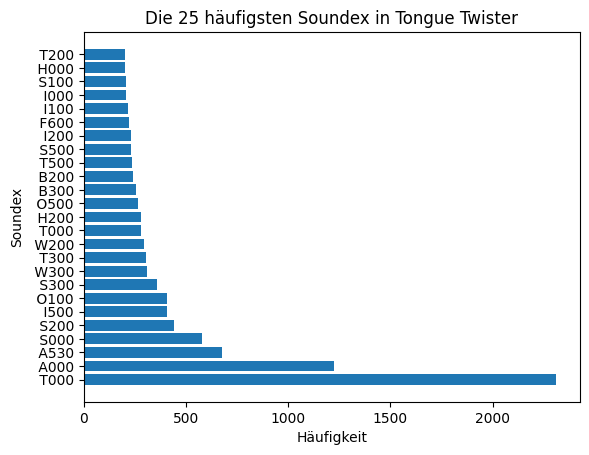

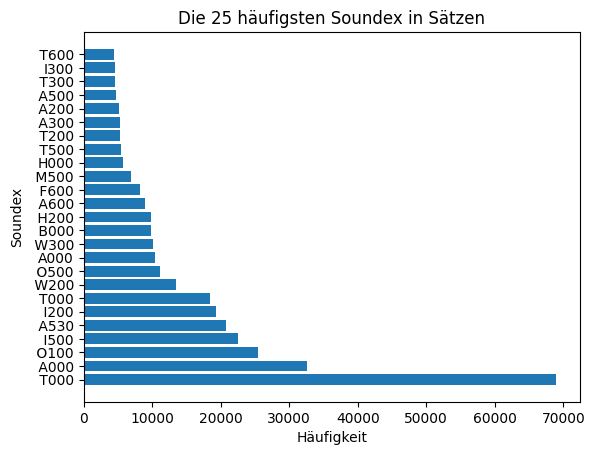

In [38]:
# Häufigkeiten
def zähle_soundex(listeVonListen):
    soundexHäufigkeit = Counter()

    for soundexStr in listeVonListen:
        soundexStr = soundexStr.replace('[', '').replace(']', '').replace("'", '')
        soundex = soundexStr.split(",")
        soundexHäufigkeit.update(soundex)
    return soundexHäufigkeit

### TT
sound = tt['soundex']
anzahlSound = zähle_soundex(sound)
dfAnzahlSoundex = pd.DataFrame(list(anzahlSound.items()), columns=['Soundex', 'Häufigkeit'])

# Sortiere das DataFrame nach der Häufigkeit
dfAnzahlSoundex = dfAnzahlSoundex.sort_values(by='Häufigkeit', ascending=False)

# Speichern der 25 häufigsten Phoneme
top25Sound = dfAnzahlSoundex.head(25)

#Visualisierung in einem Balkendiagramm
plt.barh(top25Sound['Soundex'], top25Sound['Häufigkeit'])
plt.xlabel('Häufigkeit')
plt.ylabel('Soundex')
plt.title('Die 25 häufigsten Soundex in Tongue Twister')
plt.show()


### Sentence
soundSent = sentence['soundex']
anzahlSoundSent = zähle_soundex(soundSent)
dfAnzahlSoundexSent = pd.DataFrame(list(anzahlSoundSent.items()), columns=['Soundex', 'Häufigkeit'])

# Sortiere das DataFrame nach der Häufigkeit
dfAnzahlSoundexSent = dfAnzahlSoundexSent.sort_values(by='Häufigkeit', ascending=False)

# Speichern der 25 häufigsten Phoneme
top25SoundSent = dfAnzahlSoundexSent.head(25)

#Visualisierung in einem Balkendiagramm
plt.barh(top25SoundSent['Soundex'], top25SoundSent['Häufigkeit'])
plt.xlabel('Häufigkeit')
plt.ylabel('Soundex')
plt.title('Die 25 häufigsten Soundex in Sätzen')
plt.show()

In [ ]:
# Soundexhäufigkeiten je TT/Satz (Überprüfung ob mehr gleiche/Wiederholungen/ähnliche vorkommen -> zeichnet TT aus)

### Output Tabellen

In [9]:
# TT
tt

,text,phonemes,soundex,AnzahlSätze,Wortanzahl,Wortlängen,VarWortlängen
0,Peter Piper picked a peck of pickled peppers. ...,"[['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', '...","['P360', 'P160', 'P230', 'A000', 'P200', 'O100...",3,34,"[5, 5, 6, 1, 4, 2, 7, 8, 1, 4, 2, 7, 7, 5, 5, ...",4.575260
1,I saw Susie sitting in a shoe shine shop. Wher...,"[['AY1'], ['S', 'AO1'], ['S', 'UW1', 'Z', 'IY0...","['I000', 'S000', 'S200', 'S352', 'I500', 'A000...",2,20,"[1, 3, 5, 7, 2, 1, 4, 5, 5, 5, 3, 4, 3, 7, 3, ...",2.800000
2,How many boards Could the Mongols hoard If the...,"[['HH', 'AW1'], ['M', 'EH1', 'N', 'IY0'], ['B'...","['H000', 'M500', 'B632', 'C430', 'T000', 'M524...",1,13,"[3, 4, 6, 5, 3, 7, 5, 2, 3, 6, 6, 3, 6]",2.402367
3,How can a clam cram in a clean cream can?,"[['HH', 'AW1'], ['K', 'AE1', 'N'], ['AH0'], ['...","['H000', 'C500', 'A000', 'C450', 'C650', 'I500...",1,10,"[3, 3, 1, 4, 4, 2, 1, 5, 5, 4]",1.960000
4,Send toast to ten tense stout saints' ten tall...,"[['S', 'EH1', 'N', 'D'], ['T', 'OW1', 'S', 'T'...","['S530', 'T230', 'T000', 'T500', 'T520', 'S330...",1,10,"[4, 5, 2, 3, 5, 5, 7, 3, 4, 6]",2.040000
...,...,...,...,...,...,...,...
2671,Then step up mister and twist your tongue,"[['DH', 'EH1', 'N'], ['S', 'T', 'EH1', 'P'], [...","['T500', 'S310', 'U100', 'M236', 'A530', 'T230...",1,8,"[4, 4, 2, 6, 3, 5, 4, 6]",1.687500
2672,Now Kissle will whistle at busty Miss. Russell...,"[['N', 'AW1'], ['K', 'IH1', 'S', 'AH0', 'L'], ...","['N000', 'K240', 'W400', 'W234', 'A300', 'B230...",2,31,"[3, 6, 4, 7, 2, 5, 5, 7, 6, 6, 3, 6, 4, 6, 4, ...",3.506764
2673,"Purple paper people, purple paper people, purp...","[['P', 'ER1', 'P', 'AH0', 'L'], ['P', 'EY1', '...","['P614', 'P160', 'P140', 'P614', 'P160', 'P140...",1,10,"[6, 5, 7, 6, 5, 7, 6, 5, 7, 3]",1.410000
2674,De doorgaans dappere Durgerdammer drukker Dirk...,"[['D', 'IY1'], ['D', 'AO1', 'R', 'G', 'AH0', '...","['D000', 'D625', 'D160', 'D626', 'D626', 'D620...",2,53,"[2, 9, 7, 12, 7, 4, 10, 3, 8, 5, 9, 5, 12, 6, ...",8.142399


In [10]:
# Sentence
sentence

,sentence,phonemes,soundex,AnzahlSätze,Wortanzahl,Wortlängen,VarWortlängen
0,He was accorded a State funeral and was buried...,"[['HH', 'IY1'], ['W', 'AA1', 'Z'], ['AH0', 'K'...","['H000', 'W200', 'A263', 'A000', 'S330', 'F564...",1,14,"[2, 3, 8, 1, 5, 7, 3, 3, 6, 2, 7, 3, 9, 9]",7.122449
1,In American English whilst is considered to be...,"[['IH0', 'N'], ['AH0', 'M', 'EH1', 'R', 'AH0',...","['I500', 'A562', 'E524', 'W423', 'I200', 'C523...",1,11,"[2, 8, 7, 6, 2, 10, 2, 2, 11, 2, 8]",11.520661
2,Once again she is seen performing on a compute...,"[['W', 'AH1', 'N', 'S'], ['AH0', 'G', 'EH1', '...","['O520', 'A250', 'S000', 'I200', 'S500', 'P616...",1,10,"[4, 5, 3, 2, 4, 10, 2, 1, 17, 6]",20.840000
3,Hippety Hopper returns in McKimsons Pop Im Pop.,"[['HH', 'IH1', 'P', 'AH0', 'T', 'IY0'], ['HH',...","['H130', 'H160', 'R365', 'I500', 'M252', 'P100...",1,8,"[7, 6, 7, 2, 9, 3, 2, 4]",6.000000
4,Today their programs are available on the Inte...,"[['T', 'AH0', 'D', 'EY1'], ['DH', 'EH1', 'R'],...","['T300', 'T600', 'P626', 'A600', 'A141', 'O500...",1,8,"[5, 5, 8, 3, 9, 2, 3, 9]",7.000000
...,...,...,...,...,...,...,...
101098,Force B Adml.,"[['F', 'AO1', 'R', 'S'], ['B', 'IY1'], [], ['A...","['F620', 'B000', 'A354']",1,3,"[5, 1, 5]",3.555556
101099,It has less complex feature than other micropr...,"[['IH1', 'T'], ['HH', 'AE1', 'Z'], ['L', 'EH1'...","['I300', 'H200', 'L200', 'C514', 'F360', 'T500...",1,8,"[2, 3, 4, 7, 7, 4, 5, 15]",14.609375
101100,Here his attention was drawn to geology.,"[['HH', 'IY1', 'R'], ['HH', 'IH1', 'Z'], ['AH0...","['H600', 'H200', 'A353', 'W200', 'D650', 'T000...",1,7,"[4, 3, 9, 3, 5, 2, 8]",6.122449
101101,Every element of Milnor Ktheory can be written...,"[['EH1', 'V', 'ER0', 'IY0'], ['EH1', 'L', 'AH0...","['E160', 'E455', 'O100', 'M456', 'K360', 'C500...",1,14,"[5, 7, 2, 6, 7, 3, 2, 7, 2, 1, 6, 3, 2, 8]",5.515306
